In [35]:
### Reference: https://github.com/michaeltinsley/Gridworld-with-Q-Learning-Reinforcement-Learning-/blob/master/Gridworld.ipynb 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib
matplotlib.style.use("ggplot")

In [9]:
class GridWorld:
    def __init__(self):
        self.n_rows = 5
        self.n_cols = 5
        self.grid_reward = np.zeros((self.n_rows, self.n_cols)) - 1

        # set locations 
        self.current_location = (self.n_rows - 1, np.random.randint(0, self.n_cols))
        self.bomb_location = (1, 3)
        self.gold_location = (0, 3)
        self.terminal_states = set([self.bomb_location, self.gold_location])
        
        self.grid_reward[self.bomb_location[0], self.bomb_location[1]] = -10
        self.grid_reward[self.gold_location[0], self.gold_location[1]] = 10
        
        self.actions = ["UP", "DOWN", "LEFT", "RIGHT"]
        
    def get_available_actions(self):
        return self.actions[:]
        
    def agent_on_map(self):
        grid = np.zeros([self.n_rows, self.n_cols])
        grid[self.current_location[0], self.current_location[1]] = 1
        return grid 
        
    def get_reward(self, location):
        return self.grid_reward[location[0], location[1]]
        
    def make_step(self, action):
        last_location = self.current_location
        
        if action == "UP":
            if last_location[0] == 0:
                reward = self.get_reward(last_location)
            else:
                self.current_location = (self.current_location[0] - 1, self.current_location[1])
                reward = self.get_reward(self.current_location)
            
        elif action == "DOWN":
            if last_location[0] == self.n_rows - 1:
                reward = self.get_reward(last_location)
            else:
                self.current_location = (self.current_location[0] + 1, self.current_location[1])
                reward = self.get_reward(self.current_location)
            
        elif action == "LEFT":
            if last_location[1] == 0:
                reward = self.get_reward(last_location)
            else:
                self.current_location = (self.current_location[0], self.current_location[1] - 1)
                reward = self.get_reward(self.current_location)
            
        elif action == "RIGHT":
            if last_location[1] == self.n_cols - 1:
                reward = self.get_reward(last_location)
            else:
                self.current_location = (self.current_location[0], self.current_location[1] + 1)
                reward = self.get_reward(self.current_location)
            
        return reward
        
    def check_state(self):
        if self.current_location in self.terminal_states:
            return "TERMINAL"
        else:
            return ""


In [13]:
class RandomAgent():
    def choose_action(self, available_actions):
        return np.random.choice(available_actions)

In [14]:
env = GridWorld()
agent = RandomAgent()

print(f"Current potition: {env.current_location}")
print(env.agent_on_map())
available_actions = env.get_available_actions()
chosen_action = agent.choose_action(available_actions)
print(f"Randomly chosen action: {chosen_action}")
reward = env.make_step(chosen_action)
print(f"Reward: {reward}")
print(f"Current position: {env.current_location}")
print(env.agent_on_map())
 

Current potition: (4, 1)
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]
Randomly chosen action: RIGHT
Reward: -1.0
Current position: (4, 2)
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]]


In [27]:
class Q_agent():
    def __init__(self, environment, epsilon=0.05, alpha=0.1, gamma=1.):
        self.environment = environment
        self.q_table = {}
        for r in range(environment.n_rows):
            for c in range(environment.n_cols):
                self.q_table[(r, c)] = {"UP": 0, "DOWN": 0, "LEFT": 0, "RIGHT": 0}
                
        self.epsilon = epsilon
        self.alpha = alpha
        self.gamma = gamma
        
    def choose_action(self, available_actions):
        if np.random.uniform(0, 1) < self.epsilon:
            action = available_actions[np.random.randint(0, len(available_actions))]
        else:
            q_values_of_state = self.q_table[self.environment.current_location]
            max_value = max(q_values_of_state.values())
            action = np.random.choice(
                [a for a, v in q_values_of_state.items() if v == max_value]
            )
        return action
        
    def learn(self, old_state, action, reward, new_state):
        q_values_of_state = self.q_table[new_state]
        maxX_q_values_in_new_state = max(q_values_of_state.values())
        current_q_value = self.q_table[old_state][action]
        self.q_table[old_state][action] = (1. - self.alpha) * current_q_value + self.alpha * (reward + self.gamma * maxX_q_values_in_new_state)
        


In [28]:
def play(environment, agent, num_trials=500, max_steps_per_episode=1000, learn=False):
    reward_per_episode = []
    for trial in range(num_trials):
        cumulative_rewrad = 0
        steps = 0
        game_over = False
        while steps < max_steps_per_episode and not game_over:
            old_state = environment.current_location
            action = agent.choose_action(environment.get_available_actions())
            reward = environment.make_step(action)
            new_state = environment.current_location
            
            if learn:
                agent.learn(old_state, action, reward, new_state)
                
            cumulative_rewrad += reward
            steps += 1
            if environment.check_state() == "TERMINAL":
                game_over = True 
                environment.__init__()        
        reward_per_episode.append(cumulative_rewrad)       
    return reward_per_episode


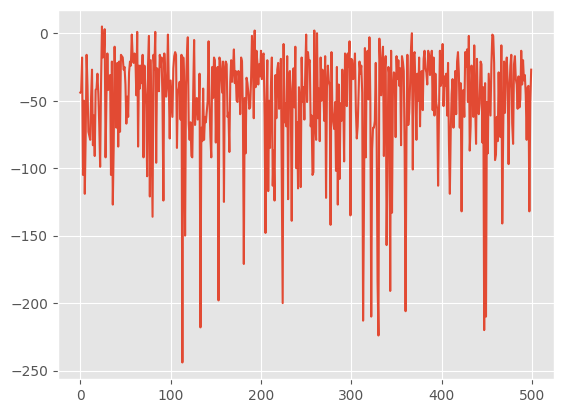

In [37]:
environment = GridWorld()
random_agent = RandomAgent()

reward_per_episode = play(environment, random_agent, num_trials=500)

plt.plot(reward_per_episode)

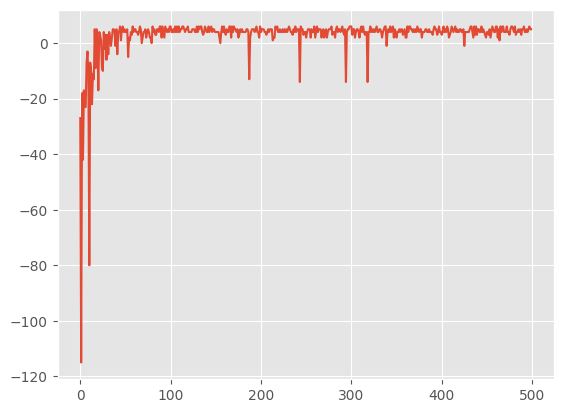

In [32]:
environment = GridWorld()
agentQ = Q_agent(environment)

# Note the learn=True argument!
reward_per_episode = play(environment, agentQ, num_trials=500, learn=True)

# Simple learning curve
plt.plot(reward_per_episode)